# Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## other

In [34]:
import scipy.stats as stats

# Data

In [3]:
filename = 'data/diamonds.csv'

In [4]:
n = sum(1 for line in open(filename)) - 1
s = 2000
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(filename, skiprows=skip, index_col=0)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47
63,0.30,Ideal,D,SI1,62.5,57.0,552,4.29,4.32,2.69
64,0.30,Ideal,D,SI1,62.1,56.0,552,4.30,4.33,2.68
152,0.74,Ideal,I,SI1,61.3,56.0,2769,5.82,5.86,3.57
154,0.73,Premium,G,VS2,61.4,59.0,2770,5.83,5.76,3.56


In [6]:
X_num = df.iloc[:, [0, 4, 5, 6, 7, 8]].copy()

In [7]:
y = X_num.pop('price')
y.head()

27      355
63      552
64      552
152    2769
154    2770
Name: price, dtype: int64

In [8]:
X_num.head()

,carat,depth,table,x,y
27,0.24,62.5,57.0,3.97,3.94
63,0.30,62.5,57.0,4.29,4.32
64,0.30,62.1,56.0,4.30,4.33
152,0.74,61.3,56.0,5.82,5.86
154,0.73,61.4,59.0,5.83,5.76


In [9]:
X_cat = df.iloc[:, [1, 2, 3]].copy()
X_cat.head()

,cut,color,clarity
27,Premium,I,VS1
63,Ideal,D,SI1
64,Ideal,D,SI1
152,Ideal,I,SI1
154,Premium,G,VS2


## Column Definitions

carat (num): weight in carats (1 carat = 200 mg) (0.2--5.01)

cut (cat): quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color (cat): diamond color (J (worst) -- D (best))

clarity (cat): how obvious inclusions are within the diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

depth (num): height of diamond, measured from the culet (bottom tip) to the table (top), divided by its average girdle (widest dimension) diameter = z / mean(x, y) (43--79)

table (num): width of diamond's table (top) expressed as a percentage of its average diameter

price (num): price in US dollars (326--18,823)

x (num): length in mm (0--10.74)

y (num): width in mm (0--58.9)

z (num): depth in mm (0--31.8)

# Diamond Dimensions
<img src = 'data/diamondanatomyimproved.jpg'>

## EDA

### Data Distributions

In [10]:
# sns.pairplot(df);

## Variable Distributions

### Carat Distribution

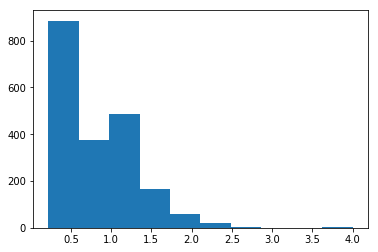

In [11]:
plt.hist(df['carat']);

### Price Distribution

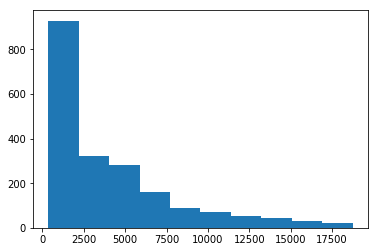

In [12]:
plt.hist(df['price']);

## Feature Relationship

### Carat vs x

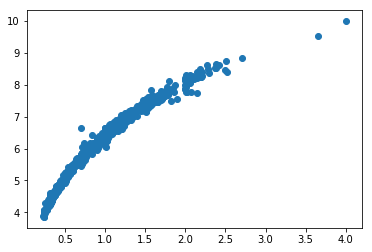

In [13]:
plt.scatter(df['carat'], df['x']);

### Carat vs y

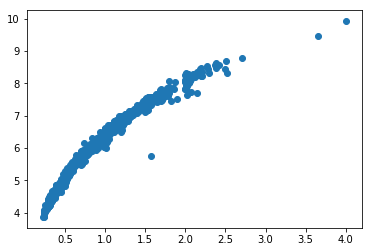

In [14]:
plt.scatter(df['carat'], df['y']);

### Carat vs z

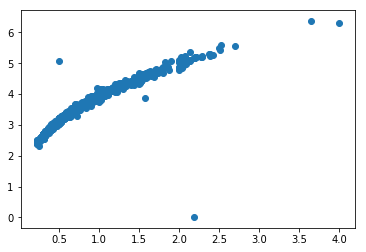

In [15]:
plt.scatter(df['carat'], df['z']);

## Feature-Target Plots

### Carat vs Price

Text(0,0.5,'Price ($)')

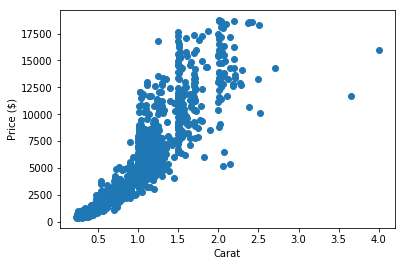

In [16]:
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat')
plt.ylabel('Price ($)')

# Pre-processing

## Categorical Data

### One-Hot Encoding

In [17]:
X_cat_enc = pd.get_dummies(X_cat)
X_cat_enc.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
63,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
64,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
154,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Oridnal

In [18]:
X_cat_ord = X_cat.copy()

In [19]:
cut_ord = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_ord = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_ord = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ord_list = [cut_ord, color_ord, clarity_ord]

In [20]:
# replace string feature labels with ordinal values
for i, column in enumerate(X_cat_ord.columns):
    
    # create label dictionary for each categorical feature
    label_dict = {}
    for j, label in enumerate(ord_list[i]):
        # map each label to ordinal value
        label_dict[label] = j
    
    # replace feature labels with ordinal values
    X_cat_ord[column] = X_cat_ord[column].map(label_dict)

In [21]:
X_cat.head()

,cut,color,clarity
27,Premium,I,VS1
63,Ideal,D,SI1
64,Ideal,D,SI1
152,Ideal,I,SI1
154,Premium,G,VS2


In [22]:
X_cat_ord.head()

,cut,color,clarity
27,3,1,4
63,4,6,2
64,4,6,2
152,4,1,2
154,3,3,3


## Combine Numerical and Categorical Features

In [23]:
X = pd.concat([X_num, X_cat_enc], axis=1)
X.head()

,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27,0.24,62.5,57.0,3.97,3.94,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
63,0.30,62.5,57.0,4.29,4.32,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
64,0.30,62.1,56.0,4.30,4.33,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0.74,61.3,56.0,5.82,5.86,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
154,0.73,61.4,59.0,5.83,5.76,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Test/Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize Data

In [25]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

# Modeling

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X_train_norm, y_train)
lin_reg.score(X_train_norm, y_train)

0.9063619588666746

## Cross-validation

In [28]:
np.mean(cross_val_score(lin_reg, X_train_norm, y_train, cv=10))

0.8984514289380773

## Evaluation

In [29]:
lin_reg.score(X_test_norm, y_test)

0.9073273311643019

In [61]:
# plot residuals, q-q

### Accuracy

In [30]:
predictions = lin_reg.predict(X_test_norm)

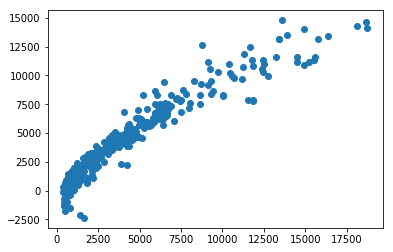

In [31]:
plt.scatter(y_test, predictions);

### Residuals

In [32]:
residuals = y_test - predictions

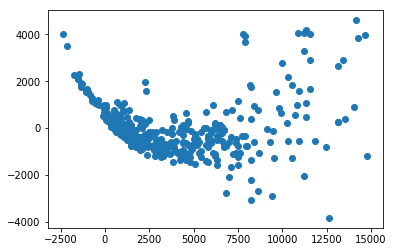

In [33]:
plt.scatter(predictions, residuals);

### Q-Q Plot

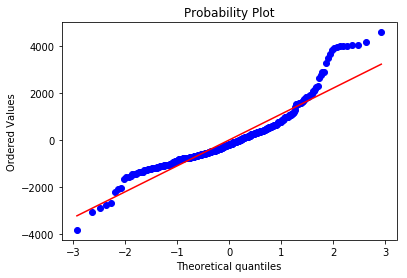

In [36]:
stats.probplot(residuals, dist="norm", plot=plt);

# Model Refinement

## Log Transform of Feature Variable

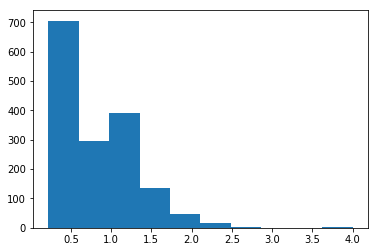

In [44]:
plt.hist(X_train['carat']);

In [37]:
X_train_ln = X_train.copy()
X_train_ln['carat'] = X_train_ln['carat'].apply(np.log)
X_test_ln = X_test.copy()
X_test_ln['carat'] = X_test_ln['carat'].apply(np.log)

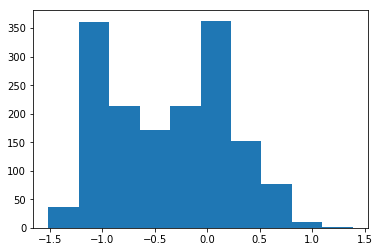

In [45]:
plt.hist(X_train_ln['carat']);

In [38]:
lin_reg.fit(X_train_ln, y_train)
lin_reg.score(X_train_ln, y_train)

0.9147346334171519

In [39]:
np.mean(cross_val_score(lin_reg, X_train_ln, y_train, cv=10))

0.9084046255210249

In [40]:
lin_reg.score(X_test_ln, y_test)

0.9023827178086394

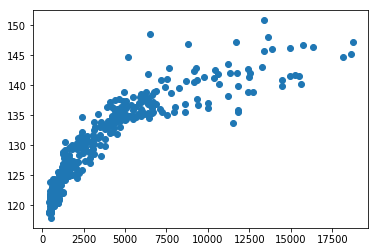

In [56]:
predictions = lin_reg.predict(X_test_ln)
plt.scatter(y_test, predictions);

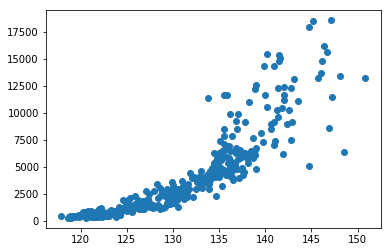

In [57]:
residuals = y_test - predictions
plt.scatter(predictions, residuals);

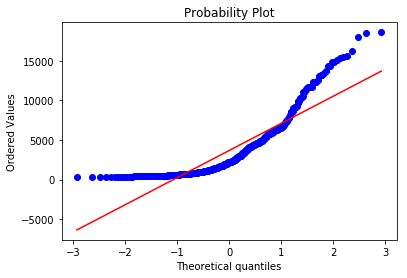

In [58]:
stats.probplot(residuals, dist="norm", plot=plt);

## Log Transform of Target Variable

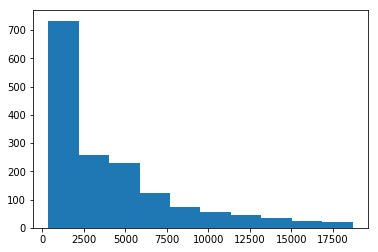

In [46]:
plt.hist(y_train);

In [47]:
y_train_ln = np.log(y_train)
y_test_ln = np.log(y_test)

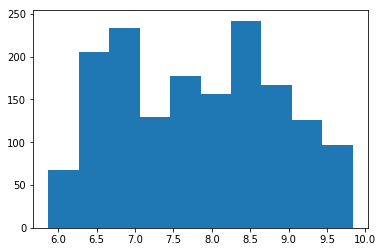

In [49]:
plt.hist(y_train_ln);

In [50]:
lin_reg.fit(X_train_norm, y_train_ln)
lin_reg.score(X_train_norm, y_train_ln)

0.9828563530495689

In [51]:
np.mean(cross_val_score(lin_reg, X_train_norm, y_train_ln, cv=10))

0.9819062960032101

In [52]:
lin_reg.score(X_test_norm, y_test_ln)

0.9798795466357169

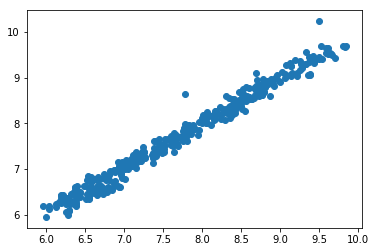

In [59]:
predictions = lin_reg.predict(X_test_norm)
plt.scatter(y_test_ln, predictions);

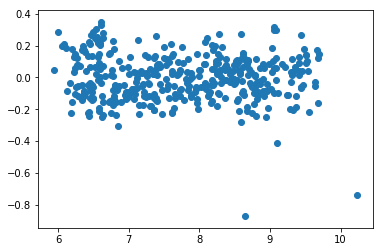

In [60]:
residuals = y_test_ln - predictions
plt.scatter(predictions, residuals);

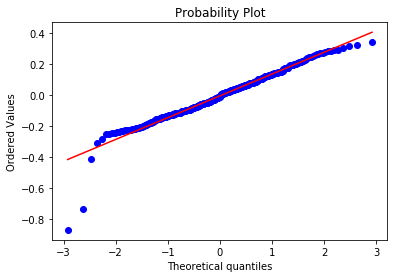

In [61]:
stats.probplot(residuals, dist="norm", plot=plt);

## Polynomial Transformation of Feature Variables

In [63]:
poly = PolynomialFeatures(degree=3)
X_train_norm_poly = poly.fit_transform(X_train_norm)
X_test_norm_poly = poly.transform(X_test_norm)

In [64]:
lin_reg.fit(X_train_norm_poly, y_train)
lin_reg.score(X_train_norm_poly, y_train)

0.9944652930863179

In [65]:
cross_val_score(lin_reg, X_train_norm_poly, y_train, cv=10)

-1.9537104450197212e+18

In [ ]:
lin_reg.score(X_test_norm_poly, y_test)

## Regularization

In [66]:
alpha_range = np.linspace(0.001, 10, 10)

In [67]:
LR_ridge = linear_model.RidgeCV(alphas=alpha_range, cv=10, scoring='r2')
LR_ridge.fit(X_train_norm_poly, y_train)
LR_ridge.score(X_train_norm_poly, y_train)

0.9790726033167326

In [68]:
LR_ridge.alpha_

1.1119999999999999

In [69]:
LR_ridge.score(X_test_norm_poly, y_test)

0.9588443438974035

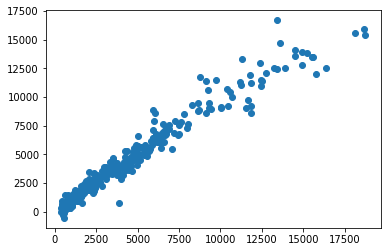

In [73]:
predictions = LR_ridge.predict(X_test_norm_poly)
plt.scatter(y_test, predictions);

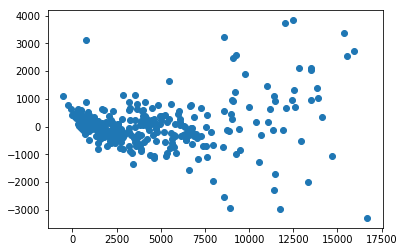

In [74]:
residuals = y_test - predictions
plt.scatter(predictions, residuals);

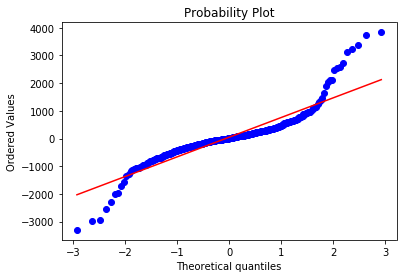

In [75]:
stats.probplot(residuals, dist="norm", plot=plt);

# Final Model

In [76]:
lin_reg.fit(X_train_norm_poly, y_train_ln)
lin_reg.score(X_train_norm_poly, y_train_ln)

0.9963165510964594

In [78]:
cross_val_score(lin_reg, X_train_norm_poly, y_train_ln, cv=10)

array([-6.38458352e+17, -8.42237729e+15, -6.05397141e+15, -3.36320583e+15,
       -7.65969796e+16, -1.05519847e+17, -2.65132582e+16, -6.14069657e+18,
       -3.53235830e+17, -1.09696138e+18])

In [79]:
lin_reg.score(X_test_norm_poly, y_test_ln)

-6.868830020346973e+16

## Regularization

In [80]:
alpha_range = np.linspace(0.001, 10, 10)

In [81]:
LR_ridge = linear_model.RidgeCV(alphas=alpha_range, cv=10, scoring='r2')
LR_ridge.fit(X_train_norm_poly, y_train_ln)
LR_ridge.score(X_train_norm_poly, y_train_ln)

0.9894942087303993

In [82]:
LR_ridge.score(X_test_norm_poly, y_test_ln)

0.9789926428670411

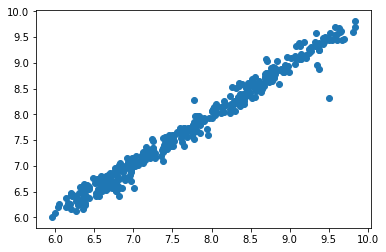

In [83]:
predictions = LR_ridge.predict(X_test_norm_poly)
plt.scatter(y_test_ln, predictions);

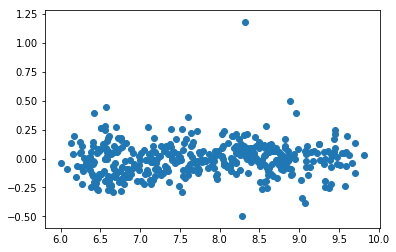

In [84]:
residuals = y_test_ln - predictions
plt.scatter(predictions, residuals);

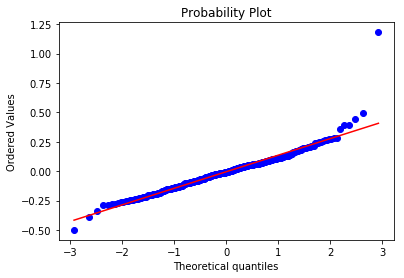

In [85]:
stats.probplot(residuals, dist="norm", plot=plt);

# Model Interpretation